In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import yoda
yoda.__file__
%pwd

'/sdf/group/ldmx/users/dongyi/data/NLO_50k/Events/run_01'

In [11]:
root_path = '/sdf/group/ldmx/users/dongyi/data/'
Event = '/Events/run_01'
DATA='/ATLAS_2019_I1759875'
figure_pre = '/HEPData-ins1759875-v1-Table_'
table_type=['lepton pT', r'lepton |$eta$|', 'dilepton pT', 'dilepton invariant mass', 'dilepton |rapidity|', 'azimuthal angle between the leptons']
xtitle=[r'$p_T^{lep}$[GeV]', r'$|\eta^{lep}|$', r'$p_T^{dilep}$[GeV]', r'$M^{dilep}$[GeV]', r'$y^{dilep}$', r'$\Delta\phi^{lep}$']
figure_type=['4a', '4b', '4c', '4d', '6a', '6b'] # 4a, b, c, d, are pT>20, 40, 60, 80; 6a, b are leading b jet and sub leading b jet
figure_no = ['/d01-x01-y01', '/d01-x01-y02', '/d02-x01-y01', '/d02-x01-y02', '/d03-x01-y01', '/d04-x01-y01', '/d05-x01-y01', '/d06-x01-y01']
MC_yoda=['NLO_5m_DATA', 'NLO_DELTA_5m_DATA']
yoda_suff = '.yoda'
title = 'Normalized differential cross-section vs ' 
plot_name = ['l_pT', 'l_eta', 'dil_pT', 'dil_inv_mass', 'dil_rap', 'dil_angle']

#plot_path = root_path + 'NLO_1k' + Event + '/python-plots' + DATA + '/' + plot_name[0] + '.png'
plot_path = root_path + 'JO_plots/NLO_5m' + DATA + '/' + plot_name[0] + '.png'
NLO_file  = root_path+'BATCH'+'/NLO_5m_ATLAS_CMS'+yoda_suff
print(NLO_file)
print(plot_path)

/sdf/group/ldmx/users/dongyi/data/BATCH/NLO_5m_ATLAS_CMS.yoda
/sdf/group/ldmx/users/dongyi/data/JO_plots/NLO_5m/ATLAS_2019_I1759875/l_pT.png


In [151]:
for i in range(6):
    print('%02d'%((i+1)*2))

02
04
06
08
10
12


In [13]:
def plotting(datax, datay, data_xerr, data_yerr, NLO_5m, NLO_yerr, DELTA_5m, DELTA_yerr, title, plot_path, xtitle):
    xEdges = np.append(np.append(1.5*datax[0] - datax[1]*.5, [(datax[i] + datax[i+1])*.5 for i in range(len(datax)-1)]), 1.5*datax[-1]-.5*datax[-2])
    fig, axs = plt.subplots(3, 1, sharex=True, gridspec_kw={'height_ratios':[3, 1, 1]}, figsize=(10,8))
    fig.subplots_adjust(hspace=0)
    axs[0].errorbar(datax, NLO_5m, color = 'red', marker='o', linestyle='none', xerr=data_xerr, yerr=NLO_yerr, label='NLO_5m')
    axs[0].errorbar(datax, DELTA_5m, color = 'green', marker='o', linestyle='none', xerr=data_xerr, yerr=DELTA_yerr, label='NLO_DELTA_5m')
    axs[0].errorbar(datax, datay, marker='o', linestyle='none', xerr=data_xerr, yerr=data_yerr, label='DATA')
    axs[0].legend()
    axs[0].set_xlim(min(xEdges), max(xEdges))
    axs[0].set_yscale('log')
    axs[0].set_title(title)
    
    axs[1].stairs(NLO_5m/datay, xEdges, color='red')
    axs[1].stairs(DELTA_5m/datay, xEdges, color='green')
    axs[1].plot(xEdges, np.ones(len(xEdges)), '--')
    axs[1].fill_between(xEdges, np.ones(len(xEdges))+np.append(data_yerr/datay,0),np.ones(len(xEdges))-np.append(data_yerr/datay,0), color='blue', alpha=0.2, step='post', label='DATA')
    axs[1].set_ylabel('MC/DATA', fontsize=6)
    axs[1].set_ylim(0.8, 1.2)
    axs[1].legend(bbox_to_anchor=(.99, 1.05))


    axs[2].stairs(DELTA_5m/NLO_5m, xEdges, color='blue')
    axs[2].plot(xEdges, np.ones(len(xEdges)), 'g--')
    axs[2].fill_between(xEdges, np.ones(len(xEdges))+np.append(DELTA_yerr/DELTA_5m,0),np.ones(len(xEdges))-np.append(DELTA_yerr/DELTA_5m,0), color='green', alpha=0.2, step='post', label='MC')
    axs[2].set_ylabel('DELTA/NLO', fontsize=6)
    axs[2].set_xlabel(xtitle)
    axs[2].legend(bbox_to_anchor=(.99, 1.05))
    axs[2].set_ylim(0.9, 1.1)

    fig.savefig(plot_path, bbox_inches='tight', dpi=200)


/sdf/group/ldmx/users/dongyi/data/NLO_1k/Events/run_01/ATLAS_2019_I1759875/HEPData-ins1759875-v1-Table_2.yoda
/sdf/group/ldmx/users/dongyi/data/NLO_1k/Events/run_01/ATLAS_2019_I1759875/HEPData-ins1759875-v1-Table_4.yoda
/sdf/group/ldmx/users/dongyi/data/NLO_1k/Events/run_01/ATLAS_2019_I1759875/HEPData-ins1759875-v1-Table_6.yoda
/sdf/group/ldmx/users/dongyi/data/NLO_1k/Events/run_01/ATLAS_2019_I1759875/HEPData-ins1759875-v1-Table_8.yoda
/sdf/group/ldmx/users/dongyi/data/NLO_1k/Events/run_01/ATLAS_2019_I1759875/HEPData-ins1759875-v1-Table_10.yoda
/sdf/group/ldmx/users/dongyi/data/NLO_1k/Events/run_01/ATLAS_2019_I1759875/HEPData-ins1759875-v1-Table_12.yoda


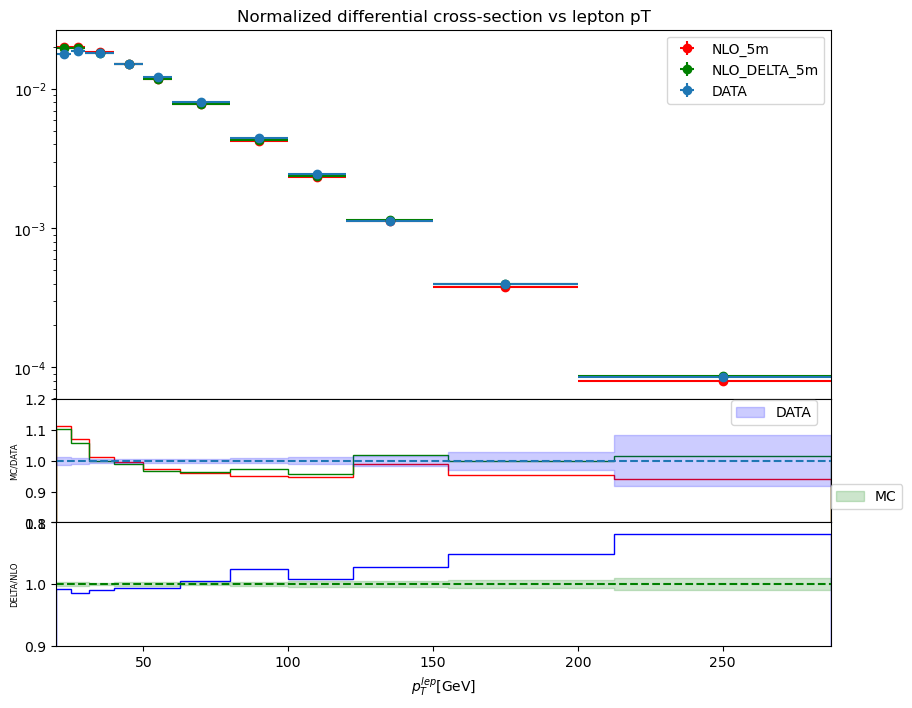

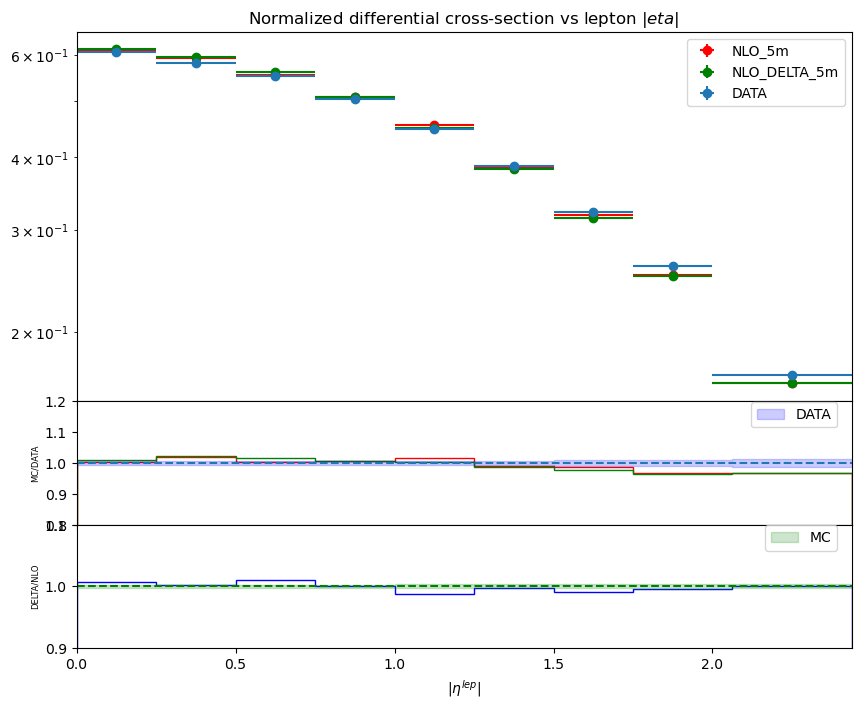

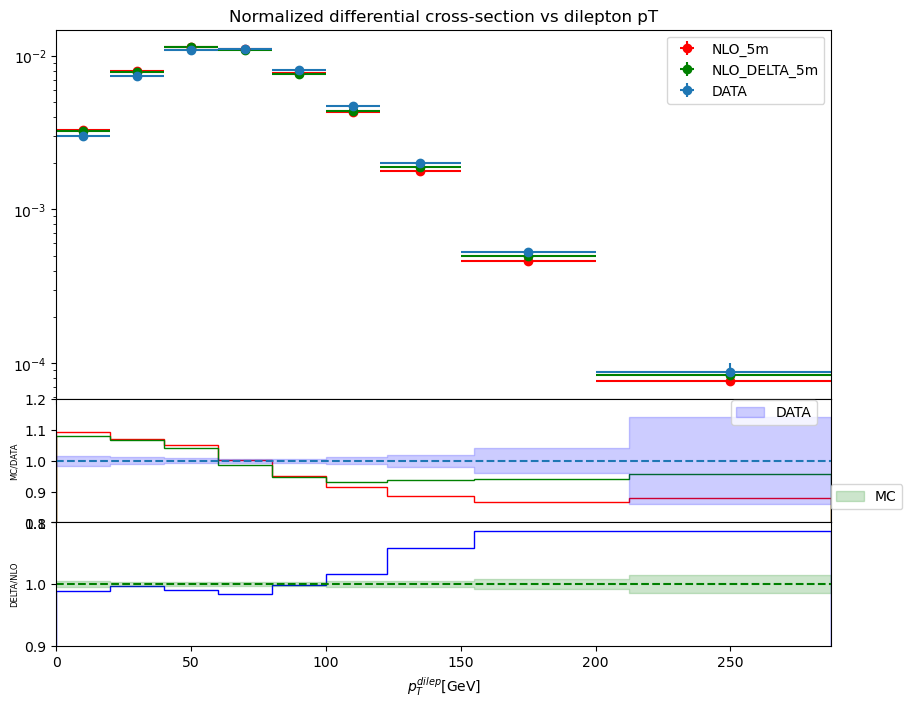

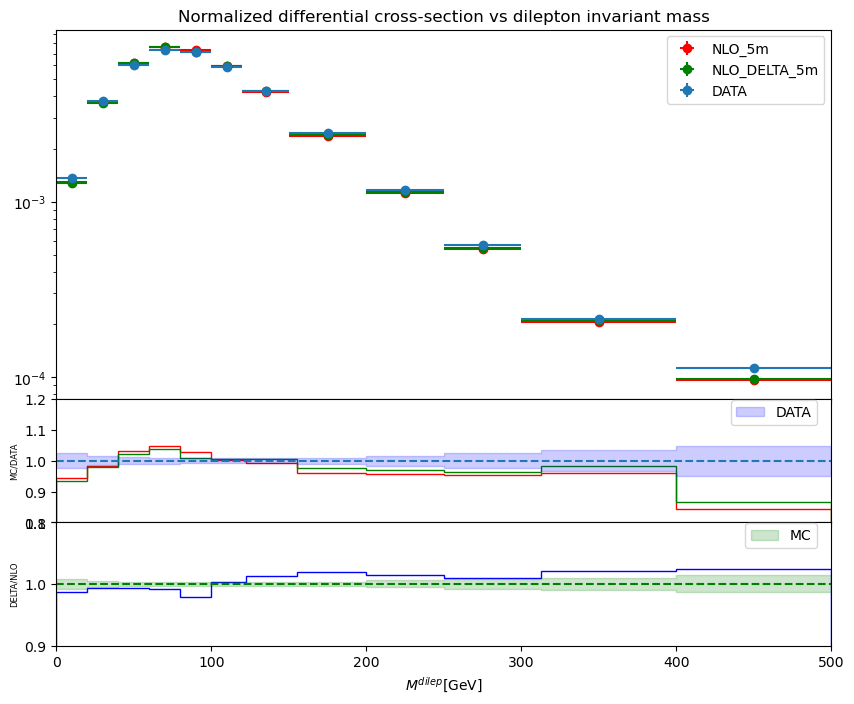

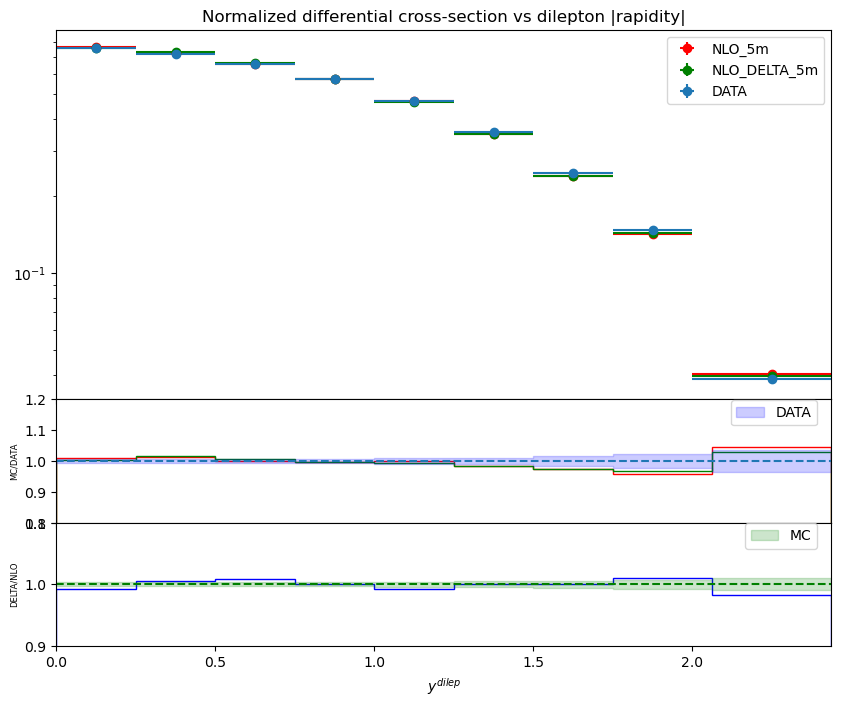

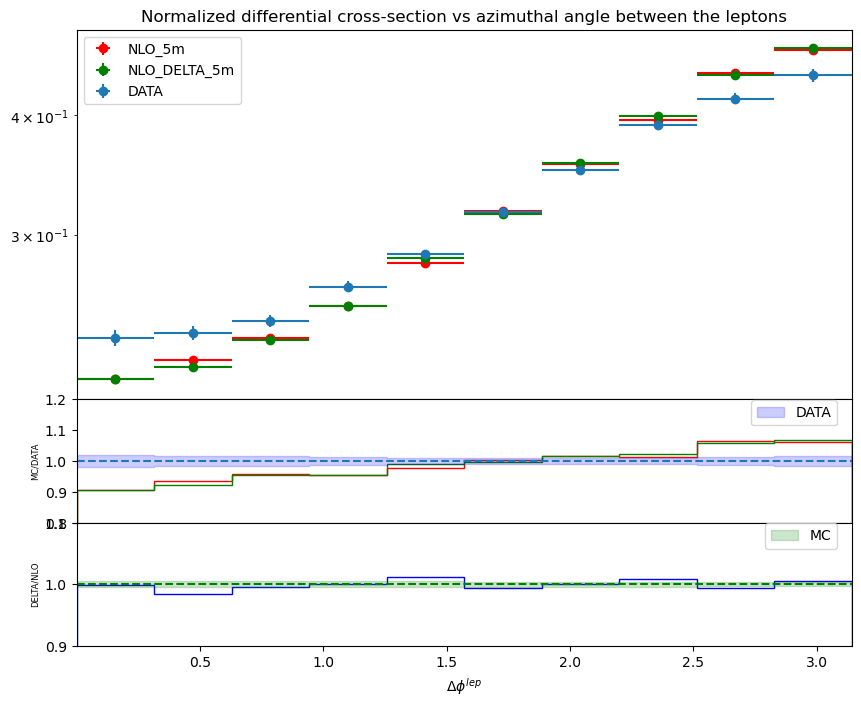

In [14]:
for i in range(len(table_type)):
    index = (i+1)*2
    DATA_file = root_path + 'NLO_1k' + Event + DATA + figure_pre + '%d'%index + yoda_suff
    print(DATA_file)
    #NLO_file   = root_path+'NLO_5m'+Event+'/NLO_5m_ATLAS_CMS'+yoda_suff # local event gen madspin is not the same as AthGen
    #DELTA_file = root_path+'NLO_DELTA_5m'+Event+'/NLO_DELTA_5m_ATLAS_CMS'+yoda_suff 
    NLO_file  = root_path+'BATCH'+'/NLO_5m_ATLAS_CMS'+yoda_suff # JO data including madspin
    DELTA_file = root_path+'BATCH'+'/NLO_DELTA_5m_ATLAS_CMS'+yoda_suff # JO data including madspin
    MC_dict = DATA + '/d' + '%02d'%index + '-x01-y01'
    DATA_dict = '/REF' + DATA +  '/d' + '%02d'%index + '-x01-y02'
    #plot_path = root_path + 'NLO_1k' + Event + '/python-plots' + DATA + DATA + '_' + plot_name[i] + '.png'
    plot_path = root_path + 'BATCH/JO_plots/' + DATA + DATA + '_' + plot_name[i] + '_JO' + '.png'
    title = 'Normalized differential cross-section vs ' + table_type[i]
    
    DATA_yoda = yoda.read(DATA_file)[DATA_dict]
    NLO = yoda.read(NLO_file)[MC_dict]
    DELTA=yoda.read(DELTA_file)[MC_dict]

    datax = DATA_yoda.xVals()
    datay = DATA_yoda.yVals()
    data_xerr = DATA_yoda.xErrs()[:,0]
    data_yerr = DATA_yoda.yErrs()[:,0]
    NLO_5m = NLO.yVals()
    NLO_yerr=NLO.yErrs()
    DELTA_5m = DELTA.yVals()
    DELTA_yerr=DELTA.yErrs()

    plotting(datax, datay, data_xerr, data_yerr, NLO_5m, NLO_yerr, DELTA_5m, DELTA_yerr, title, plot_path, xtitle[i])

In [61]:
print(NLO.yVals())
print(NLO.sumWs())
print(NLO.sumW())
    

[449.5504     451.4546     415.4494     349.9286     273.4084
 182.2305     103.0543      56.33785     26.62591333   9.025082
   1.921776  ]
[2247.752  2257.273  4154.494  3499.286  2734.084  3644.61   2061.086
 1126.757   798.7774  451.2541  192.1776]
23167.55


In [107]:
datax = DATA.xVals()
datay = DATA.yVals()
data_xerr = F1.xErrs()[:,0]
data_yerr = F1.yErrs()[:,0]
NLO_5m = NLO.yVals()
NLO_yerr=NLO.yErrs()
DELTA_5m = DELTA.yVals()
DELTA_yerr=DELTA.yErrs()
title='Normalized differential cross-section in the fiducial region as a function of lepton pT (without leptonic tau decays)'
print(NLO_5m)

[449.5504     451.4546     415.4494     349.9286     273.4084
 182.2305     103.0543      56.33785     26.62591333   9.025082
   1.921776  ]


FileNotFoundError: [Errno 2] No such file or directory: '/sdf/group/ldmx/users/dongyi/data/NLO_1k/Events/run_01/python-plot/ATLAS_2019_I1759875/l_eta.png'

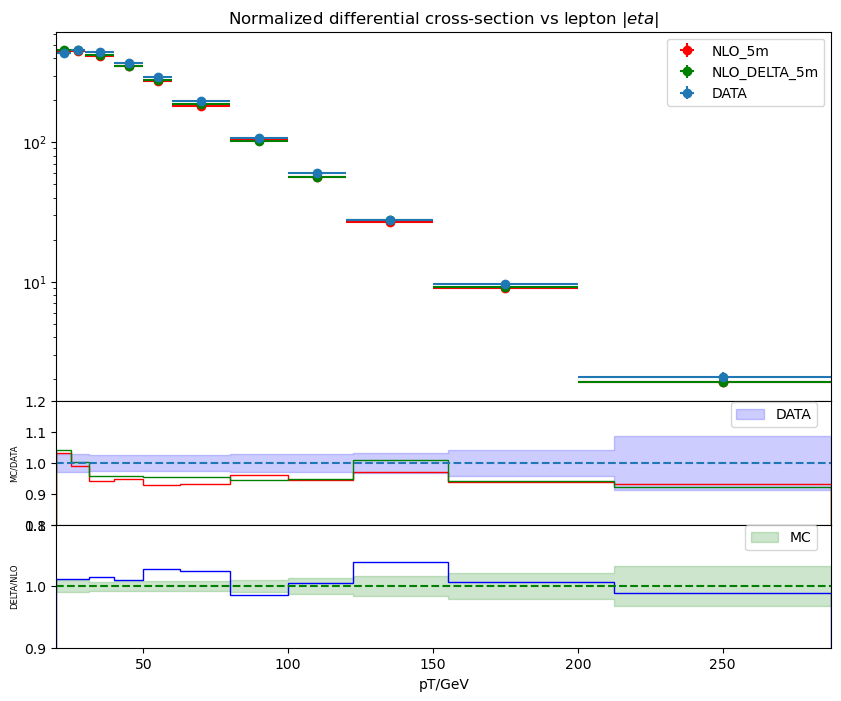

In [143]:
plotting(datax, datay, data_xerr, data_yerr, NLO_5m, NLO_yerr, DELTA_5m, DELTA_yerr, title, plot_path)